In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 生成模拟数据
# n_samples：生成的样本总数。这表示要生成的数据集中的总样本数。
# n_features：每个样本的特征数。这表示每个数据点有多少个特征，可以理解为数据的维度。
# centers：要生成的簇中心（或称之为中心点）的数量或位置。可以是一个整数表示簇中心的数量，也可以是一个数组或列表，表示每个簇中心的坐标。
# cluster_std：每个簇的标准差，表示生成的簇中样本点的离散程度。默认值为1.0。
# center_box：生成簇中心的边界框。例如，如果 centers 是一个整数，则 center_box 可以指定每个维度上簇中心的范围。
# random_state：随机种子，用于产生随机数据。通过设置该参数，可以使每次运行代码时生成的随机数据保持一致。
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 设置要尝试的聚类数
cluster_range = range(2, 10)

In [6]:
# 初始化存储轮廓系数的列表
silhouette_scores = []

# 尝试不同聚类数
for n_clusters in cluster_range:
    # 创建 KMeans 模型
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)

    # 计算轮廓系数
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

E:\software\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\software\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
E:\software\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\software\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

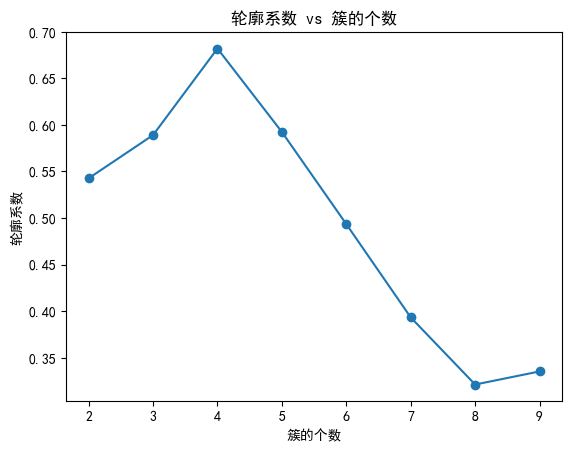

In [7]:
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
# 绘制轮廓系数与聚类数的关系图
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('簇的个数')
plt.ylabel('轮廓系数')
plt.title('轮廓系数 vs 簇的个数')
plt.show()
